Data Shape: (70000, 784)
Target Shape: (70000,)
Hidden count: 256
Iteration 0


f:\anaconda3\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


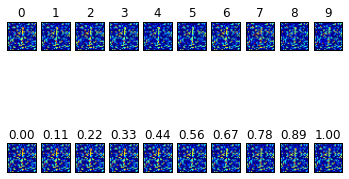

Iteration 5000


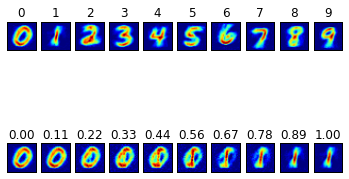

Iteration 10000


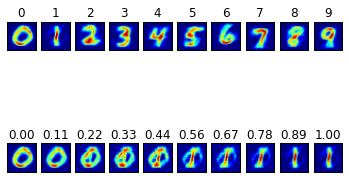

Iteration 15000


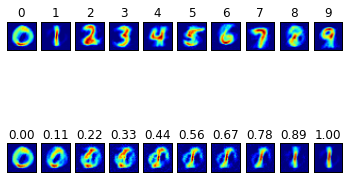

Iteration 20000


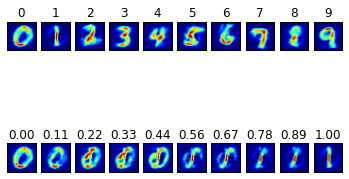

Iteration 25000


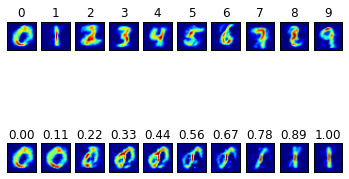

Iteration 30000


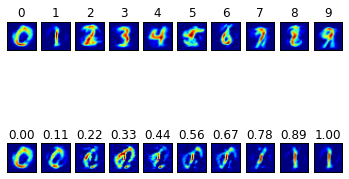

Iteration 35000


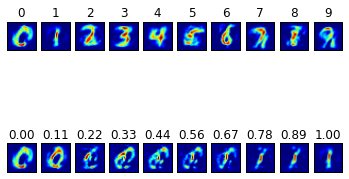

Iteration 40000


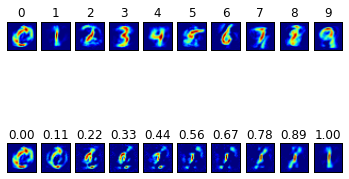

Iteration 45000


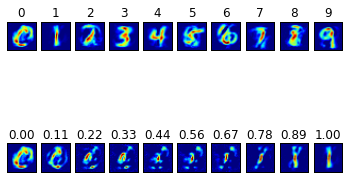

Iteration 50000


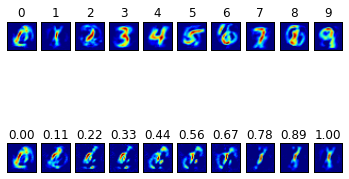

Iteration 55000


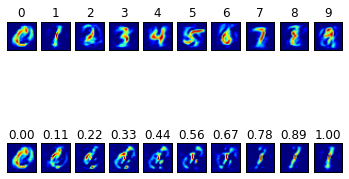

Iteration 60000


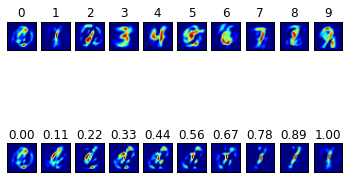

Iteration 65000


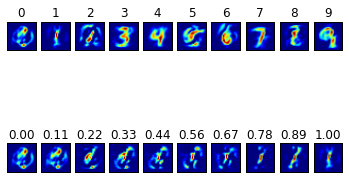

In [2]:
# %load examplelabeled.py
from util import get_mnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from gsdr import GSDR

# Get the MNIST data
mnist_data, mnist_target = get_mnist()
print("Data Shape:", mnist_data.shape)
print("Target Shape:", mnist_target.shape)

input_count = mnist_data.shape[1]
hidden_count = 256
forced_latent_count = 10

print("Hidden count:", hidden_count)

gsdr = GSDR(input_count, hidden_count, forced_latent_count)

forced_latents = np.eye(forced_latent_count)

for i in range(mnist_data.shape[0]):
    gsdr.train(mnist_data[i], forced_latents[mnist_target[i]])

    if i % 5000 == 0:
        print("Iteration", i)
        f, ax = plt.subplots(2, forced_latent_count)

        # Generate all digits from 0 to 9
        for j in range(forced_latent_count):
            generated = (255 * np.clip(gsdr.generate(forced_latents[j]), 0, 1).reshape(28, 28)).astype(np.uint8)
            img = Image.fromarray(generated)
            ax[0, j].imshow(img)
            ax[0, j].set_title(str(j))
            ax[0, j].axes.get_xaxis().set_visible(False)
            ax[0, j].axes.get_yaxis().set_visible(False)

        # Interpolate between 0 and 1
        for j in range(forced_latent_count):
            latent = j / (forced_latent_count-1) * forced_latents[1] + (1 - j / (forced_latent_count-1)) * forced_latents[0]
            generated = (255 * np.clip(gsdr.generate(latent), 0, 1).reshape(28, 28)).astype(np.uint8)
            img = Image.fromarray(generated)
            ax[1, j].imshow(img)
            ax[1, j].set_title("%.2f" % (j / (forced_latent_count-1)))
            ax[1, j].axes.get_xaxis().set_visible(False)
            ax[1, j].axes.get_yaxis().set_visible(False)

        plt.show()
